In [1]:
import pandas as pd
import matplotlib.pyplot as plt

LIST_SUBJECT = ["cs", "math", "physics"] 
VERSION = "v1"

In [2]:
all_data = {}
for subject in LIST_SUBJECT:
    file_path = f'../dataset/{subject}/bow/{VERSION}.csv'
    try:
        all_data[subject] = pd.read_csv(file_path)
        print(f"Loaded {subject}: {len(all_data[subject])} rows")
    except FileNotFoundError:
        print(f"File not found: {file_path}")

for subject, df in all_data.items():
    print(f"\n{subject.upper()} Dataset:")
    display(df.head())

Loaded cs: 165756 rows
Loaded math: 126192 rows
Loaded physics: 146311 rows

CS Dataset:


,title,submitted_date,text,tag_text
0,Fault Detection using Immune-Based Systems and...,2000-10-03,"['detection', 'immune', 'formal', 'language', ...","['Computational Engineering, Finance, and Scie..."
1,Robust Classification for Imprecise Environments,2000-09-13,"['robust', 'classification', 'imprecise', 'env...",['Machine Learning']
2,Tagger Evaluation Given Hierarchical Tag Sets,2000-08-09,"['tagger', 'hierarchical', 'tag', 'set', 'huma...",['Computation and Language']
3,Description of GADEL,2000-03-07,"['description', 'gadel', 'article', 'gadel', '...","['Artificial Intelligence', 'Logic in Computer..."
4,The dynamics of iterated transportation simula...,2000-02-22,"['dynamic', 'transportation', 'router', 'traff...","['Adaptation and Self-Organizing Systems', 'Co..."



MATH Dataset:


,title,submitted_date,text,tag_text
0,Supersymmetry and Homotopy,2000-05-26,"['supersymmetry', 'homotopical', 'information'...","['Mathematical Physics', 'Algebraic Topology']"
1,Angular Quantization of the Sine-Gordon Model ...,2000-03-06,"['angular', 'quantization', 'sine_gordon', 'fr...","['High Energy Physics - Theory', 'Quantum Alge..."
2,Finite and p-adic polylogarithms,2000-06-07,"['finite', 'adic', 'finite', 'polylogarithm', ...","['Number Theory', 'K-Theory and Homology']"
3,Lagrangian two-spheres can be symplectically k...,2000-05-31,"['lagrangian', 'sphere', 'symplectic', 'manifo...",['Differential Geometry']
4,Uniqueness of the Invariant Measure for a Stoc...,2000-09-15,"['uniqueness', 'invariant', 'measure', 'stocha...","['Chaotic Dynamics', 'Probability']"



PHYSICS Dataset:


,title,submitted_date,text,tag_text
0,Critical Dynamics of Gelation,2000-09-05,"['critical', 'dynamic', 'gelation', 'shear', '...","['Statistical Mechanics', 'Disordered Systems ..."
1,Formation of Root Singularities on the Free Su...,2000-09-14,"['formation', 'root', 'singularity', 'free', '...","['Fluid Dynamics', 'Soft Condensed Matter', 'E..."
2,Compression of High-Charge Electron Bunches,2000-08-20,"['compression', 'charge', 'electron', 'photoin...",['Accelerator Physics']
3,A realistic quasi-physical model of the 100 me...,2000-07-13,"['realistic', 'quasi', 'physical', 'metre', 'd...",['Popular Physics']
4,Optimal Control of Molecular Motion Expressed ...,2000-08-31,"['optimal', 'control', 'molecular', 'motion', ...","['Chemical Physics', 'Fluid Dynamics']"


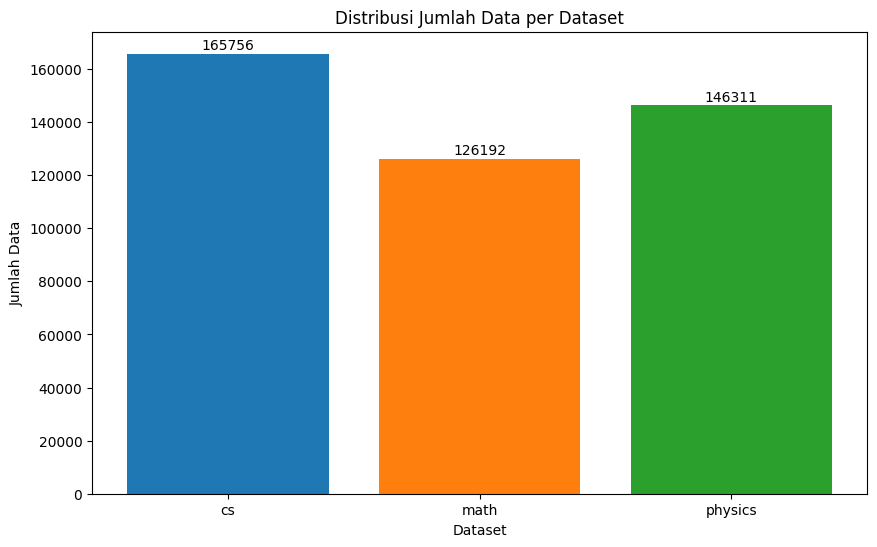

In [3]:
len_data = [len(all_data[subject]) for subject in LIST_SUBJECT if subject in all_data]
data_names = [subject for subject in LIST_SUBJECT if subject in all_data]

plt.figure(figsize=(10, 6))
plt.bar(data_names, len_data, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.title("Distribusi Jumlah Data per Dataset")
plt.ylabel("Jumlah Data")
plt.xlabel("Dataset")
for i, v in enumerate(len_data):
    plt.text(i, v + max(len_data)*0.01, str(v), ha='center')
plt.show()

In [4]:
# Combine all datasets
data = pd.concat(all_data.values(), ignore_index=True)
print(f"Total combined data: {len(data)} rows")
data.head()

Total combined data: 438259 rows


,title,submitted_date,text,tag_text
0,Fault Detection using Immune-Based Systems and...,2000-10-03,"['detection', 'immune', 'formal', 'language', ...","['Computational Engineering, Finance, and Scie..."
1,Robust Classification for Imprecise Environments,2000-09-13,"['robust', 'classification', 'imprecise', 'env...",['Machine Learning']
2,Tagger Evaluation Given Hierarchical Tag Sets,2000-08-09,"['tagger', 'hierarchical', 'tag', 'set', 'huma...",['Computation and Language']
3,Description of GADEL,2000-03-07,"['description', 'gadel', 'article', 'gadel', '...","['Artificial Intelligence', 'Logic in Computer..."
4,The dynamics of iterated transportation simula...,2000-02-22,"['dynamic', 'transportation', 'router', 'traff...","['Adaptation and Self-Organizing Systems', 'Co..."


### Barchart Journal Per Year

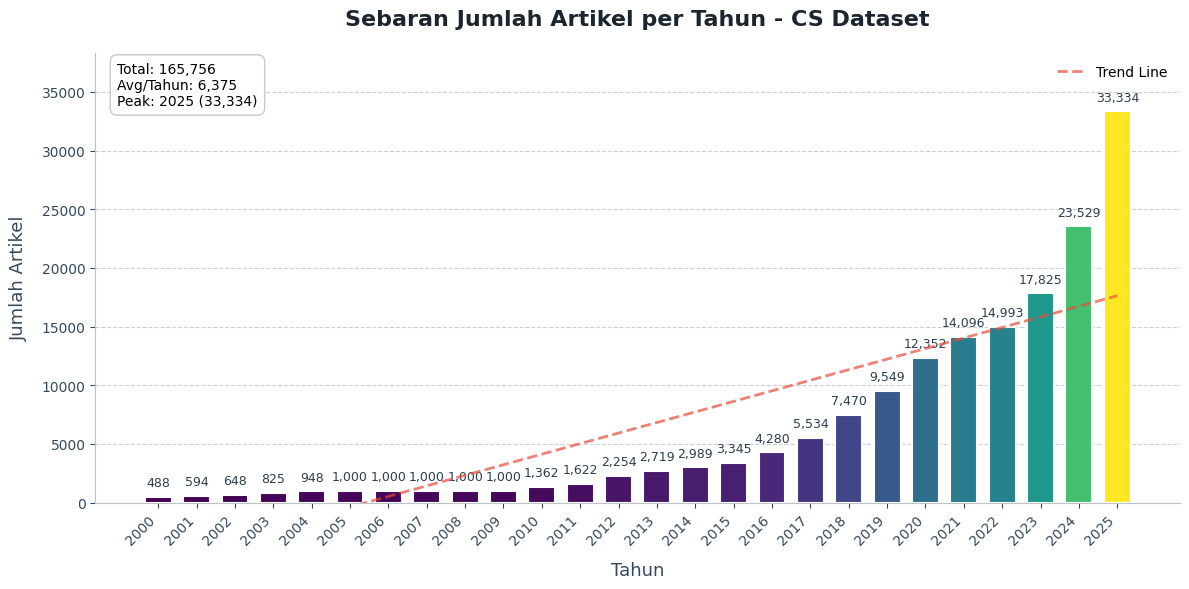

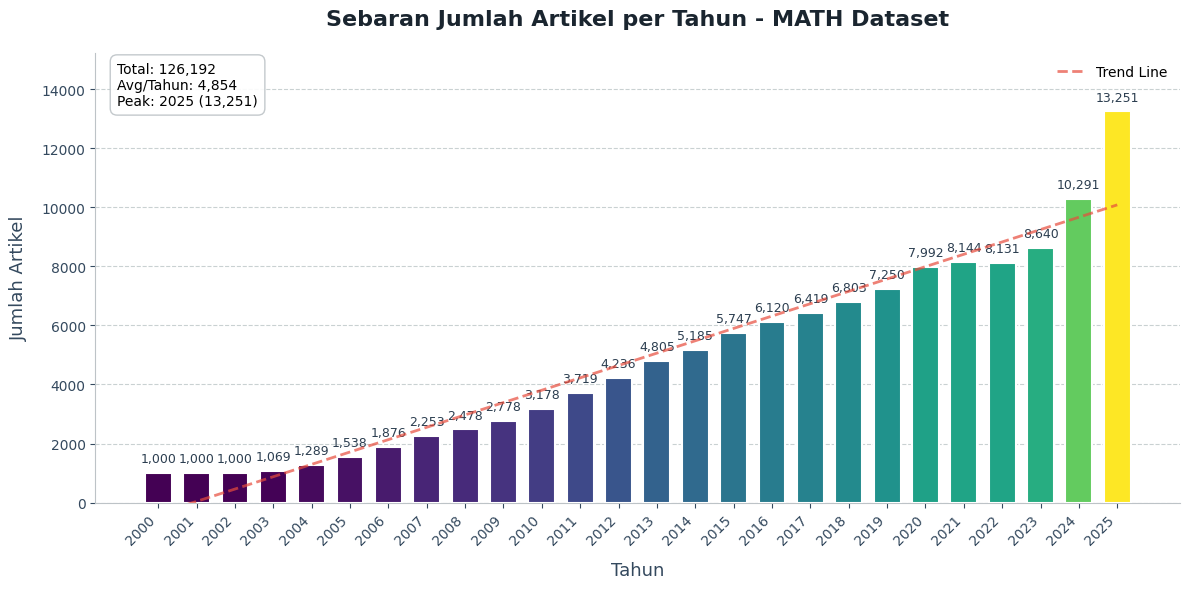

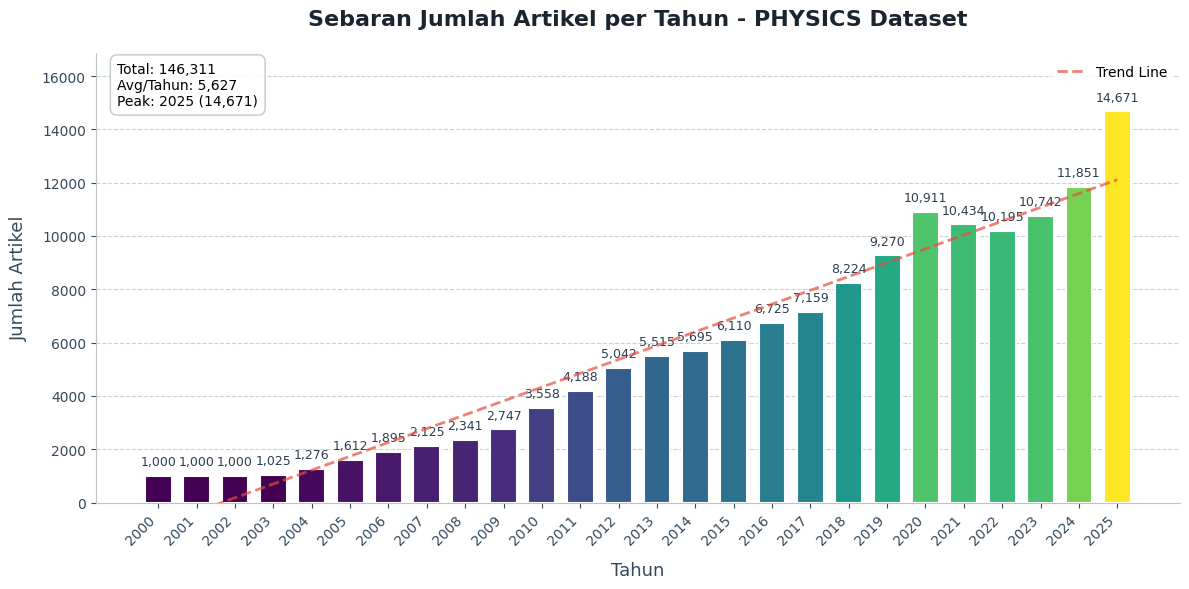

In [5]:
import matplotlib.pyplot as plt
import numpy as np

for subject in LIST_SUBJECT:
    if subject not in all_data:
        continue
    
    df = all_data[subject]
    
    df['submitted_date'] = pd.to_datetime(df['submitted_date'])
    df['year'] = df['submitted_date'].dt.year
    yearly_counts = df['year'].value_counts().sort_index()

    fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
    
    cmap = plt.colormaps.get_cmap('viridis')
    norm = plt.Normalize(yearly_counts.values.min(), yearly_counts.values.max())
    colors = [cmap(norm(val)) for val in yearly_counts.values]
    
    bars = ax.bar(
        yearly_counts.index.astype(str), 
        yearly_counts.values,
        color=colors,
        edgecolor='white',
        linewidth=1.5,
        width=0.7,
        zorder=3
    )
    
    for bar, value in zip(bars, yearly_counts.values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + yearly_counts.values.max() * 0.02,
            f'{value:,}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='medium',
            color='#2c3e50'
        )
    
    ax.set_title(
        f'Sebaran Jumlah Artikel per Tahun - {subject.upper()} Dataset',
        fontsize=16,
        fontweight='bold',
        pad=20,
        color='#1a252f'
    )
    
    ax.set_xlabel('Tahun', fontsize=13, fontweight='medium', labelpad=10, color='#34495e')
    ax.set_ylabel('Jumlah Artikel', fontsize=13, fontweight='medium', labelpad=10, color='#34495e')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#bdc3c7')
    ax.spines['bottom'].set_color('#bdc3c7')
    
    ax.tick_params(axis='both', which='major', labelsize=10, colors='#34495e')
    plt.xticks(rotation=45, ha='right')
    
    ax.yaxis.grid(True, linestyle='--', alpha=0.5, color='#95a5a6', zorder=0)
    ax.xaxis.grid(False)
    ax.set_axisbelow(True)
    
    z = np.polyfit(range(len(yearly_counts)), yearly_counts.values, 1)
    p = np.poly1d(z)
    ax.plot(
        range(len(yearly_counts)), 
        p(range(len(yearly_counts))), 
        color='#e74c3c', 
        linestyle='--', 
        linewidth=2, 
        alpha=0.7,
        label=f'Trend Line',
        zorder=4
    )
    
    stats_text = (
        f'Total: {yearly_counts.values.sum():,}\n'
        f'Avg/Tahun: {yearly_counts.values.mean():,.0f}\n'
        f'Peak: {yearly_counts.idxmax()} ({yearly_counts.max():,})'
    )
    ax.text(
        0.02, 0.98, stats_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='left',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='#bdc3c7', alpha=0.9)
    )
    
    ax.legend(loc='upper right', fontsize=10, framealpha=0.9, edgecolor='none')
    
    ax.set_ylim(0, yearly_counts.values.max() * 1.15)
    
    plt.tight_layout()
    plt.show()

### Word Count Frequency

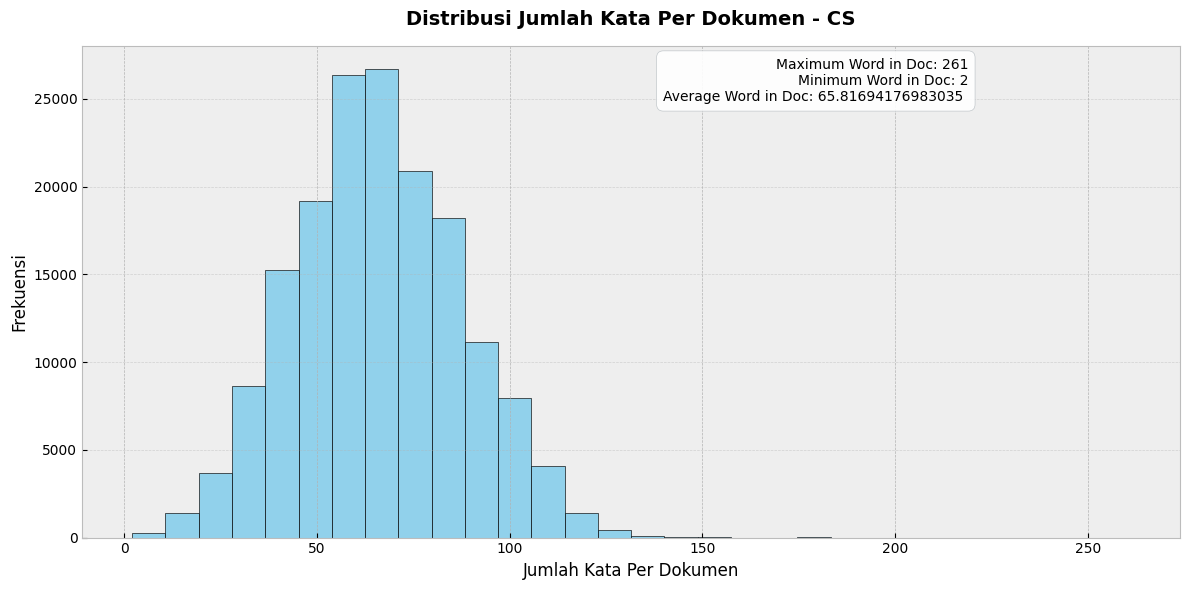

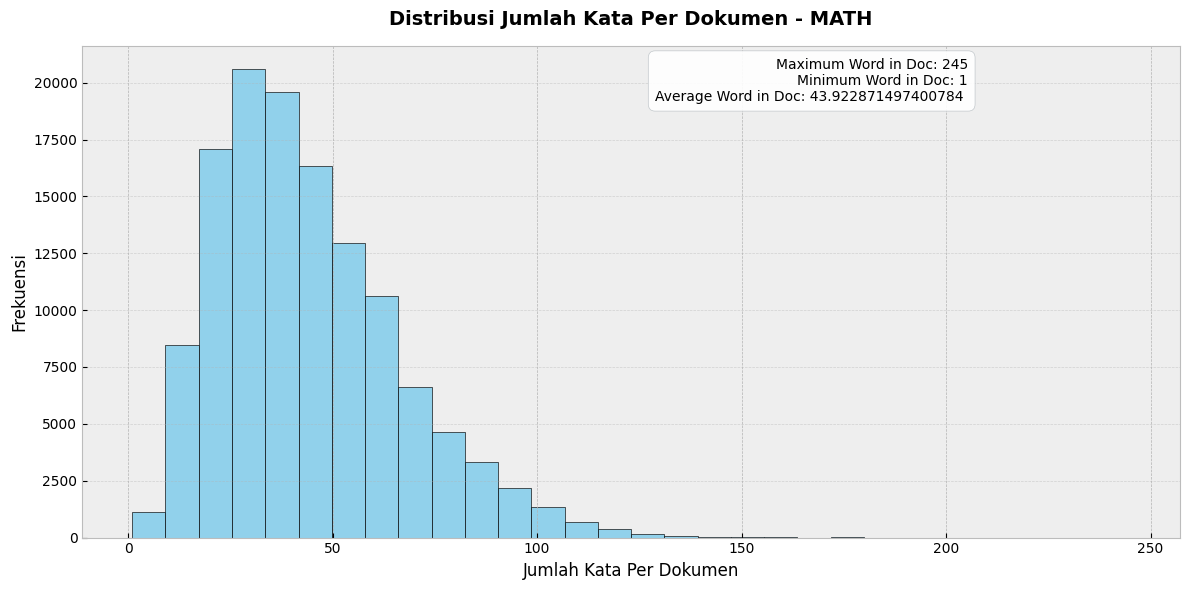

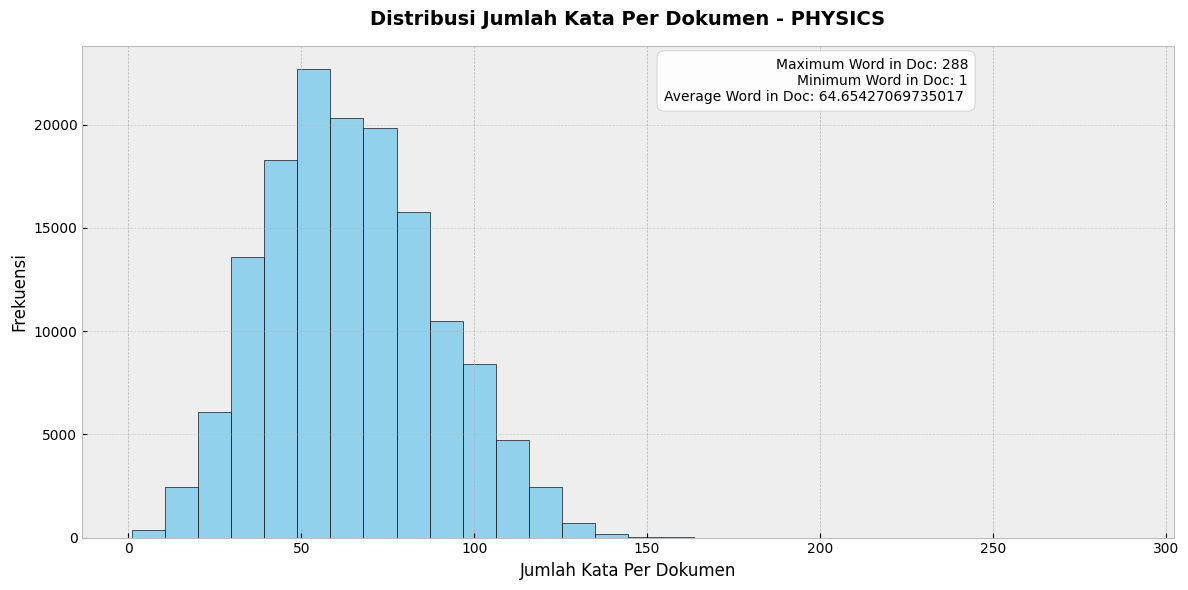

In [6]:
import matplotlib.pyplot as plt

try:
    plt.style.use('bmh')
except:
    pass

for subject in LIST_SUBJECT:
    if subject not in all_data:
        continue
    
    df = all_data[subject]
    word_counts_per_row = df["text"].str.split().str.len()
    plt.figure(figsize=(12, 6))
    plt.hist(word_counts_per_row, bins=30, color='skyblue', edgecolor='black', alpha=0.9)
    plt.xlabel("Jumlah Kata Per Dokumen", fontsize=12)
    plt.ylabel("Frekuensi", fontsize=12)
    plt.title(f"Distribusi Jumlah Kata Per Dokumen - {subject.upper()}", fontsize=14, fontweight='bold', pad=15)

    stats_text = (
        f'Maximum Word in Doc: {word_counts_per_row.max():,}\n'
        f'Minimum Word in Doc: {word_counts_per_row.min():,}\n'
        f'Average Word in Doc: {word_counts_per_row.mean()} '
    )

    plt.text(
    0.80, 0.98, stats_text,  
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='right',  # Changed from 'left' to 'right'
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='#bdc3c7', alpha=0.9)
)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()